# **Read and merge datasets**

In [286]:
import pandas as pd

movies = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')

credits = pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')


In [ ]:
movies.info()

In [ ]:
credits.info()

In [ ]:
credits.head(5)

In [287]:
credits.columns = ['id','title','cast','crew']
movies= movies.merge(credits,on='id')

Note1. In this part to have a comprehensive dataset two CSV files were merged

# **Data cleaning**

In [313]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   homepage              4799 non-null   object 
 3   id                    4799 non-null   int64  
 4   keywords              4799 non-null   object 
 5   original_language     4799 non-null   object 
 6   original_title        4799 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4799 non-null   float64
 9   production_companies  4799 non-null   object 
 10  production_countries  4799 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               4799 non-null   int64  
 13  runtime               4799 non-null   float64
 14  spoken_languages      4799 non-null   object 
 15  status               

# **Handle Null and doplicate rows**



In [ ]:
movies.isnull().sum()

In [289]:
movies['homepage'].fillna('No Homepage', inplace=True)
movies['tagline'].fillna('No Tagline', inplace=True)

In [290]:
movies.dropna(inplace=True)

In [291]:
movies.drop_duplicates(inplace=True)

In [292]:
movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

Note2. Two features, the homepage (more than 3000 lines) and tagline (more than 800) had a large number of nulls compared to the total number of lines (4802).
In this situation, it is not possible to easily delete rows with null values.
There are different methods such as Text Analysis, Imputation with a Placeholder, Feature Engineering, and Modeling with Missing Values to handle the missing values which can be chosen according to the goal of the projects.
Since the goal of this project is to find out whether a film was profitable or not, and considering having two columns (budget and revenue) we can delete columns with missing values in the next steps.
As a result, in the stage of data cleaning, I applied the " Imputation with a Placeholder" method and filled the null values in these two columns with "No Homepage" and "No Tagline".

Moreover, there are a few numbers of null values in other columns which I drop them

# **Handle Missing and outliers values**

In [ ]:
movies.info()

In [327]:
df = movies.copy()

In [ ]:
df.info()

In [328]:
# Iterate over each cell in the DataFrame
for index, row in df.iterrows():
    for column in df.columns:
        # Check if the cell contains an empty list []
        if row[column] == "[]":
            # Handle empty list based on your specific needs
            # For example, replace it with NaN
            df.at[index, column] = float('nan')  # or np.nan if numpy is imported

In [329]:
df.isnull().sum()

budget                    0
genres                   27
homepage                  0
id                        0
keywords                410
original_language         0
original_title            0
overview                  0
popularity                0
production_companies    349
production_countries    172
release_date              0
revenue                   0
runtime                   0
spoken_languages         84
status                    0
tagline                   0
title_x                   0
vote_average              0
vote_count                0
title_y                   0
cast                     41
crew                     27
dtype: int64

In [ ]:
unique_values = df['original_title'].unique()
print(unique_values)

In [330]:
df.dropna(subset=['genres', 'cast', 'crew', 'spoken_languages','keywords', 'production_companies','production_countries'], inplace=True)

In [331]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

Note3. In the following, the features of ['genres', 'cast', 'crew', 'spoken_languages','keywords', 'production_companies','production_countries'] had missing values, which I first converted to null and then deleted.

In [ ]:
# Check if titles in columns 'original_title', 'title_y', and 'title_x' are the same
df['titles_same'] = (df['original_title'] == df['title_y']) & (df['original_title'] == df['title_x'])

# Print the rows where titles are not the same
print(df[~df['titles_same']][['original_title', 'title_y', 'title_x']])


In [ ]:
df['titles_same'].value_counts()

In [333]:
df.drop(columns=['title_x','title_y','titles_same'],inplace=True)

In [334]:
df['status'].value_counts()

Released    4158
Rumored        1
Name: status, dtype: int64

In [335]:
df.drop(columns=['status'],inplace=True)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4159 non-null   int64  
 1   genres                4159 non-null   object 
 2   homepage              4159 non-null   object 
 3   id                    4159 non-null   int64  
 4   keywords              4159 non-null   object 
 5   original_language     4159 non-null   object 
 6   original_title        4159 non-null   object 
 7   overview              4159 non-null   object 
 8   popularity            4159 non-null   float64
 9   production_companies  4159 non-null   object 
 10  production_countries  4159 non-null   object 
 11  release_date          4159 non-null   object 
 12  revenue               4159 non-null   int64  
 13  runtime               4159 non-null   float64
 14  spoken_languages      4159 non-null   object 
 15  tagline              

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe(include= 'all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
count,4.159000e+03,4159,4159,4159.000000,4159,4159,4159,4159,4159.000000,4159,...,4159.000000,4159,4159,4159,4159,4159.000000,4159.00000,4159,4159,4159
unique,NaN,1095,1542,NaN,4050,34,4158,4159,NaN,3454,...,NaN,513,2,3653,4157,NaN,NaN,4157,4159,4159
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",No Homepage,NaN,"[{""id"": 10183, ""name"": ""independent film""}]",en,Batman,"In the 22nd century, a paraplegic Marine is di...",NaN,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,No Tagline,The Host,NaN,NaN,The Host,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
freq,NaN,299,2598,NaN,26,3924,2,1,NaN,55,...,NaN,2771,4158,493,2,NaN,NaN,2,1,1
mean,3.275433e+07,NaN,NaN,50047.427747,NaN,NaN,NaN,NaN,24.326257,NaN,...,108.874489,NaN,NaN,NaN,NaN,6.226761,789.89685,NaN,NaN,NaN
std,4.223655e+07,NaN,NaN,81895.465261,NaN,NaN,NaN,NaN,33.241085,NaN,...,20.655180,NaN,NaN,NaN,NaN,0.962532,1297.47857,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.001586,NaN,...,25.000000,NaN,NaN,NaN,NaN,0.000000,0.00000,NaN,NaN,NaN
25%,3.200000e+06,NaN,NaN,8052.000000,NaN,NaN,NaN,NaN,7.015043,NaN,...,95.000000,NaN,NaN,NaN,NaN,5.700000,97.00000,NaN,NaN,NaN
50%,1.800000e+07,NaN,NaN,12158.000000,NaN,NaN,NaN,NaN,15.895661,NaN,...,105.000000,NaN,NaN,NaN,NaN,6.300000,316.00000,NaN,NaN,NaN
75%,4.500000e+07,NaN,NaN,48324.500000,NaN,NaN,NaN,NaN,31.523995,NaN,...,119.000000,NaN,NaN,NaN,NaN,6.900000,875.00000,NaN,NaN,NaN


In [ ]:
correlation_matrix = df.corr()

<ipython-input-18-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


 Note4. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to 0 indicate a weak or no correlation.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

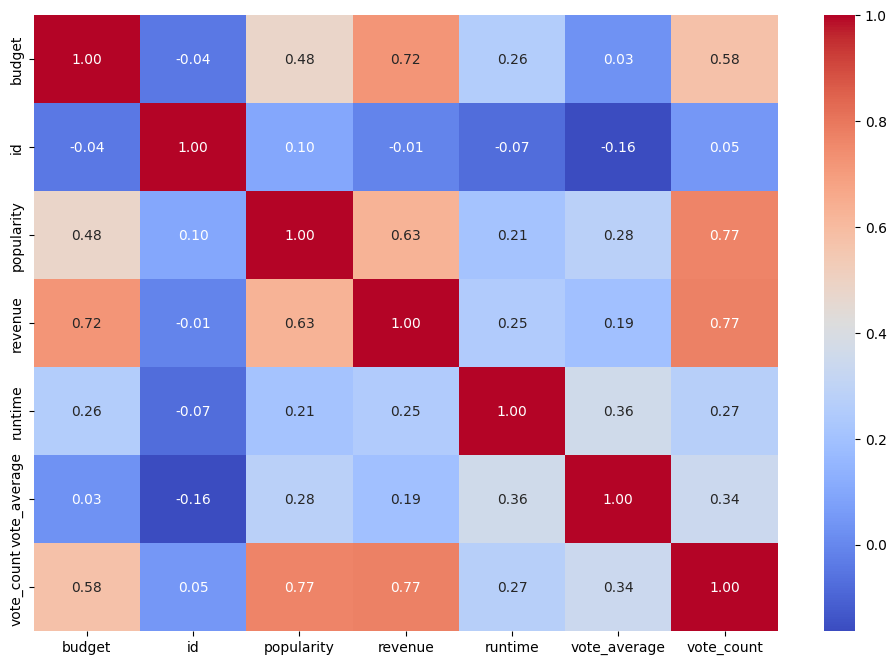

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


# Exploratory Data Analysis (EDA) in numeric columns


Q1. check the distribution of budget

In [342]:
df['budget'].value_counts()

0           638
20000000    135
30000000    126
25000000    120
40000000    115
           ... 
14600000      1
14800000      1
14200000      1
108           1
220000        1
Name: budget, Length: 411, dtype: int64

In [337]:
import matplotlib.pyplot as plt

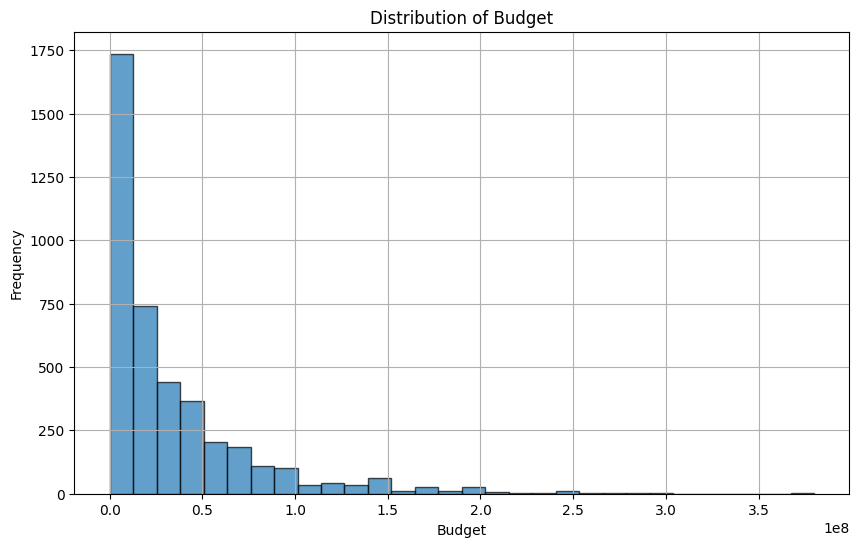

In [341]:
plt.figure(figsize=(10, 6))
plt.hist(df['budget'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.grid(True)
plt.show()

result. Most movies were built with almost 1 million dollar

Q2. plot the chart of the budget for the top 10 movies based on popularity

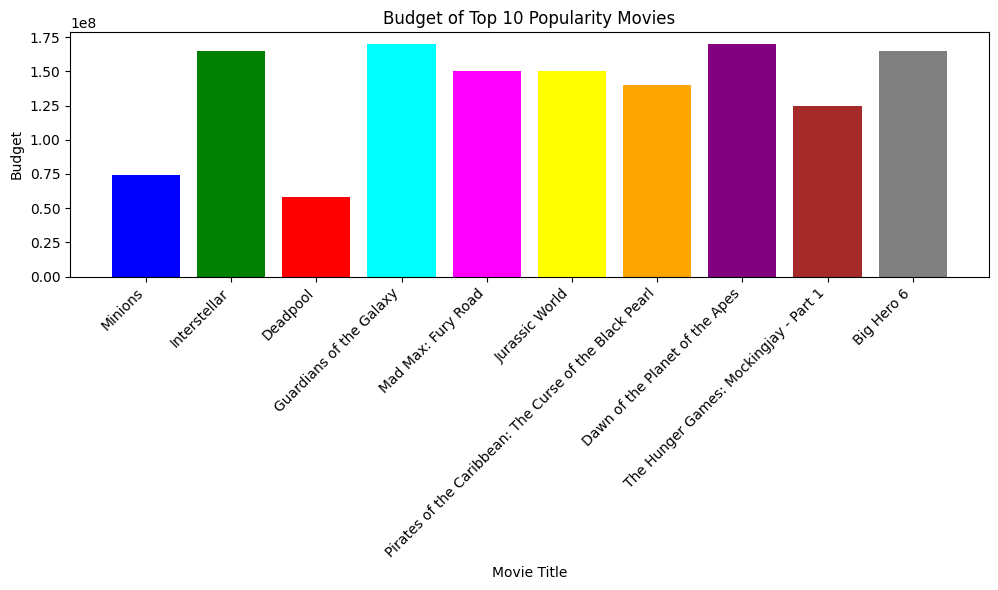

In [347]:
# Sort the DataFrame based on popularity in descending order and extract top 10 rows
top_10_popularity_movies = df.nlargest(10, 'popularity')

# Define colors for each movie
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'gray']

# Plotting the budget of top 10 popularity movies with different colors
plt.figure(figsize=(10, 6))
plt.bar(top_10_popularity_movies['original_title'], top_10_popularity_movies['budget'], color=colors)
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.title('Budget of Top 10 Popularity Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



result2. The Minions was the most popular movies that its budget less than 80 million dollar

Q3. plot the movies with the maximum and minimum budgets

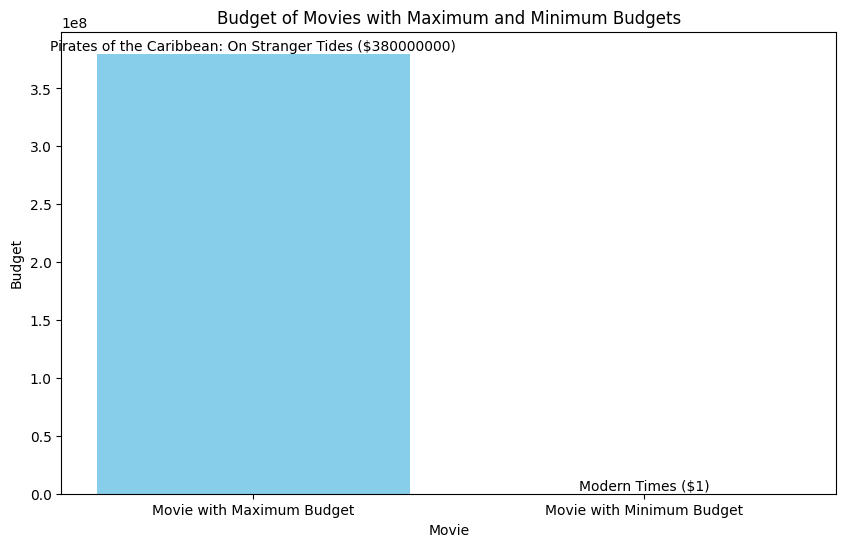

In [358]:
# Find the movie with the minimum budget excluding 0
min_budget_movie = df[df['budget'] > 0].loc[df[df['budget'] > 0]['budget'].idxmin()]
max_budget_movie = df.loc[df['budget'].idxmax()]
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Movie with Maximum Budget', 'Movie with Minimum Budget'], [max_budget_movie['budget'], min_budget_movie['budget']], color=['skyblue', 'red'])
plt.xlabel('Movie')
plt.ylabel('Budget')
plt.title('Budget of Movies with Maximum and Minimum Budgets')

# Add annotations for movie names and budgets
plt.text(0, max_budget_movie['budget'], f"{max_budget_movie['original_title']} (${max_budget_movie['budget']})", ha='center', va='bottom')
plt.text(1, min_budget_movie['budget'], f"{min_budget_movie['original_title']} (${min_budget_movie['budget']})", ha='center', va='bottom')

plt.show()




result3. pirates of the Caribbean on Stranger Tides was the most expensive movie and The Modern Times was the lowest cost.

Q4. What is the average rating of the 10 most expensive movies?

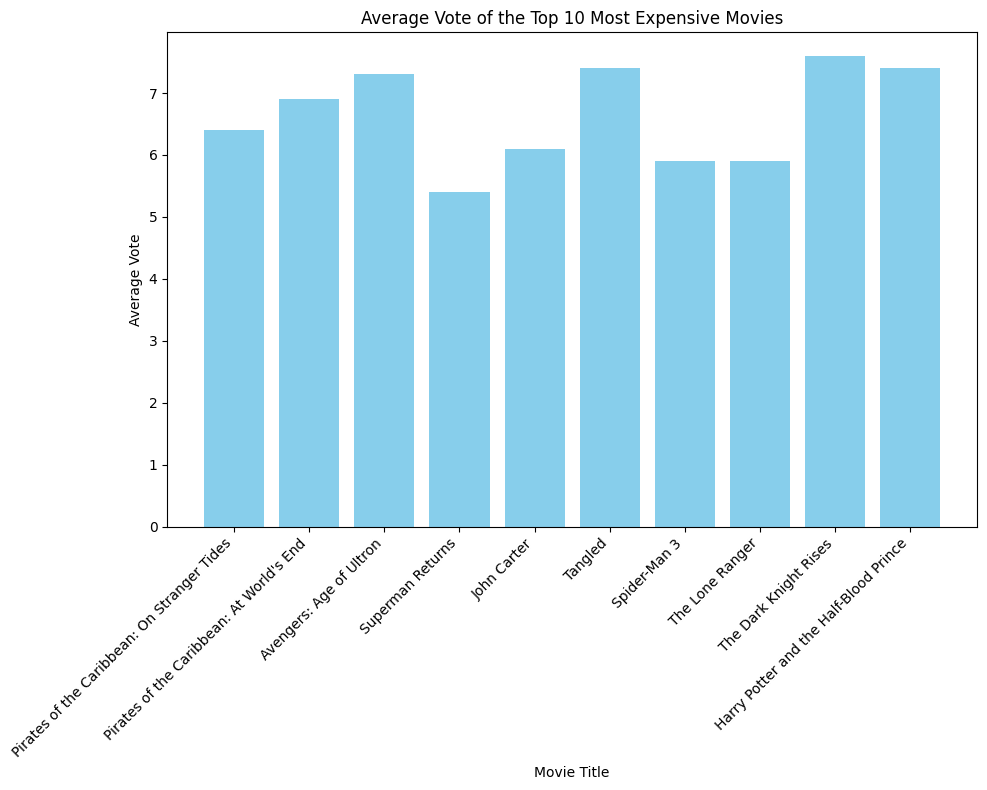

In [356]:
# Sort the DataFrame by 'budget' column to get the top 10 most expensive movies
top_expensive_movies = df.nlargest(10, 'budget')

# Plot the average rating
plt.figure(figsize=(10, 8))
plt.bar(top_expensive_movies['original_title'], top_expensive_movies['vote_average'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Average Vote')
plt.title('Average Vote of the Top 10 Most Expensive Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


result4. The Dark Knight Rises has most average rating

Q5. How many votes did the 10 most expensive movies have?

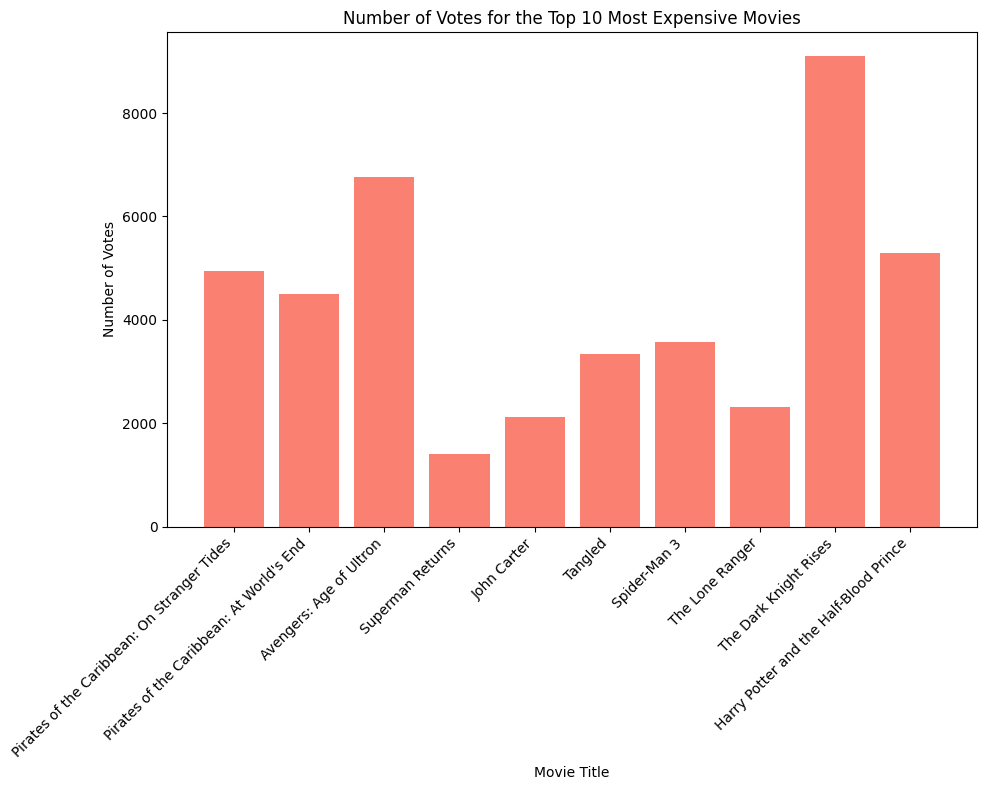

In [359]:
# Sort the DataFrame by 'budget' column to get the top 10 most expensive movies
top_expensive_movies = df.nlargest(10, 'budget')

# Plot the number of votes
plt.figure(figsize=(10, 8))
plt.bar(top_expensive_movies['original_title'], top_expensive_movies['vote_count'], color='salmon')
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')
plt.title('Number of Votes for the Top 10 Most Expensive Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


result5. more than 8000 for The Dark knight rises